**Proyek: Analisis Harga Kopi**

**menerapkan pengetahuan bootstrap distribution dalam sebuah proyek mini!**

**Latar Belakang:**
**Anda adalah seorang analis data di sebuah perusahaan kopi spesialti. Anda baru saja menerima sampel data coffee_ratings yang berisi 500 catatan rating kopi dari seluruh dunia, termasuk variabel flavor yang merupakan skor rasa dari 0 hingga 10. Manajemen ingin memahami seberapa yakin kita tentang rata-rata skor flavor dari semua kopi spesialti di dunia (populasi), bukan hanya dari sampel yang kita miliki.**

---

**Task**

**Gunakan teknik bootstrapping untuk menganalisis data flavor dan presentasikan temuan Anda kepada manajemen.**

---


**1. Siapkan Data:**

- Anggap Anda memiliki DataFrame pandas bernama coffee_sample yang berisi 500 baris data kopi, dengan salah satu kolomnya adalah flavor. (Anda bisa membuat data simulasi jika perlu).

In [12]:
import pandas as pd
import numpy as np

# --- Membuat Dataset Simulasi ---

# Menetapkan seed untuk reproduktifitas, agar hasil acak kita selalu sama
np.random.seed(42)

# Menentukan parameter untuk data kita
jumlah_sampel = 500
rata_rata_rasa = 7.52  # Rata-rata yang realistis berdasarkan materi
std_dev_rasa = 0.35    # Standar deviasi yang realistis berdasarkan materi

# Membuat 500 data skor 'flavor' yang terdistribusi normal
skor_rasa = np.random.normal(loc=rata_rata_rasa, scale=std_dev_rasa, size=jumlah_sampel)

# Memastikan tidak ada skor yang di luar rentang 0-10 (walaupun kemungkinannya kecil)
skor_rasa = np.clip(skor_rasa, 0, 10)

# Membuat DataFrame pandas
coffee_sample = pd.DataFrame({'flavor': skor_rasa})

# --- Menampilkan Hasil ---
# print("Dataset 'coffee_sample' berhasil dibuat!")
print("Berikut adalah 5 baris pertama dari dataset:")
print(coffee_sample.head())

print("\nInformasi tentang dataset:")
coffee_sample.info()

Berikut adalah 5 baris pertama dari dataset:
     flavor
0  7.693850
1  7.471607
2  7.746691
3  8.053060
4  7.438046

Informasi tentang dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   flavor  500 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


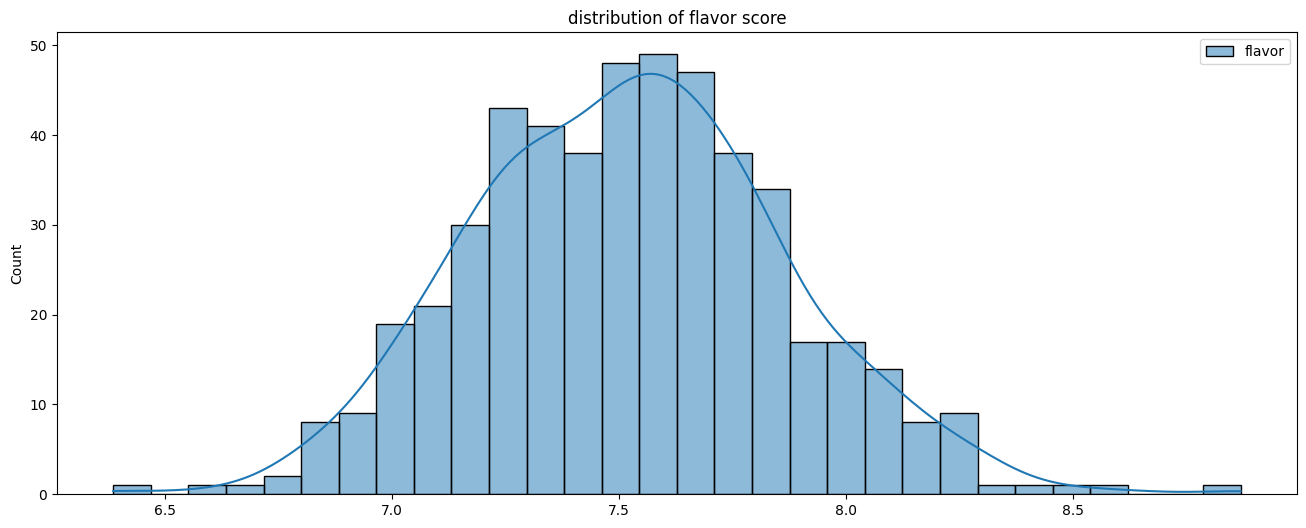

In [15]:

# histogram distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,6))
sns.histplot(coffee_sample, bins=30, kde=True)
plt.title('distribution of flavor score')
plt.show()

---

**2. Lakukan Prosedur Bootstrapping:**

- Buat sebuah list kosong untuk menampung hasil statistik bootstrap Anda (misalnya, mean_flavors_bootstrap).
- Tulis sebuah loop yang berjalan sebanyak 5000 kali.
- Di dalam setiap iterasi loop:
    - Buat sebuah bootstrap sample dari coffee_sample dengan cara mengambil sampel ulang berukuran 500 dengan pengembalian (replace=True).
    - Hitung rata-rata (mean) dari kolom flavor pada bootstrap sample tersebut.
    - Tambahkan nilai rata-rata ini ke dalam list yang sudah Anda siapkan.

In [5]:
# bootstraping resampling
mean_flavors_5000 = []  
for i in range(5000):      
    mean_flavors_5000.append(          
        np.mean(coffee_sample.sample(frac=1, replace=True)['flavor'])      
    ) 


---

**3. Analisis Distribusi Bootstrap:**

- Setelah loop selesai, konversikan list hasil Anda menjadi sebuah Series atau Array pandas/numpy.
- Hitung rata-rata dari distribusi bootstrap Anda. Ini adalah estimasi terbaik Anda untuk rata-rata populasi.
- Hitung standar deviasi dari distribusi bootstrap Anda. Ini adalah standard error dari rata-rata.
- Buat histogram dari distribusi bootstrap Anda untuk memvisualisasikan sebaran rata-rata sampel.

7.52
0.02


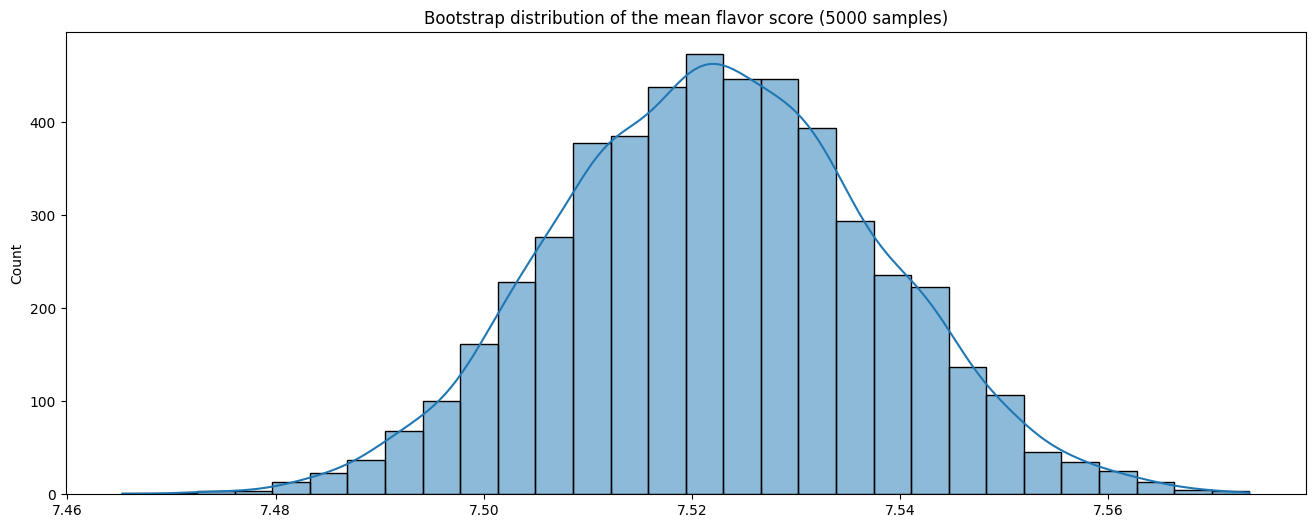

In [ ]:
# convert to series atau array
mean_flavors_5000 = pd.Series(mean_flavors_5000)
mean_flavors_5000.round(2) 

# calculater mean and std eror
print(mean_flavors_5000.mean().round(2))
print(mean_flavors_5000.std(ddof=1).round(2))

# histogram bootsraping distribution
import matplotlib.pyplot as plt
import seaborn as sns

#std error


plt.figure(figsize=(16,6))
sns.histplot(mean_flavors_5000, bins=30, kde=True)
plt.title('Bootstrap distribution of the mean flavor score (5000 samples)')
plt.show()

---

**4. Hitung Interval Kepercayaan 95%:**

- Gunakan metode kuantil (quantile) untuk menemukan interval kepercayaan 95%.
- Cari nilai pada kuantil 2.5% (0.025) sebagai batas bawah.
- Cari nilai pada kuantil 97.5% (0.975) sebagai batas atas.

In [18]:
# menghitung interval kepercayaan 95%
batas_bawah = np.quantile(mean_flavors_5000, 0.025)
batas_atas = np.quantile(mean_flavors_5000, 0.975)

print(f"Interval kepercayaan 95%(rentang kontinu a < μ < b ) (metode kuantil): [{batas_bawah:.4f}, {batas_atas:.4f}]")

Interval kepercayaan 95%(rentang kontinu a < μ < b ) (metode kuantil): [7.4927, 7.5521]


---
**Laporan Singkat rata-rata skor flavor:**

- Sajikan temuan Anda dalam beberapa poin singkat yang mudah dimengerti oleh manajemen:
    - Sebutkan rata-rata skor flavor dari sampel asli Anda.
    -  rata-rata skor flavor sample asli adalah = 7.5
    - Sebutkan perkiraan rata-rata skor flavor populasi berdasarkan distribusi bootstrap Anda.
    - perkiraan rata-rata skor flavor populasi based bootstrap distribution adalah 7.52
    - Jelaskan standard error yang Anda temukan (misalnya, "Ada ketidakpastian sekitar ±[nilai standard error] pada estimasi rata-rata kita").
    - "Kami 95% yakin bahwa rata-rata skor flavor untuk semua kopi spesialti di dunia berada di antara [7.4927(batas bawah)] dan [7.5521(batas atas])").
    - 